In [1]:
import math
import toolsar as ar
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ar.printhash()


 ##### 



In [48]:
#Q1

#matrix A
A=[[0.2,-5,3,0.4,0],[-0.5,1,7,-2,0.3],[0.6,2,-4,3,0.1],[3,0.8,2,-0.4,3],[0.5,3,2,0.4,1]]

matI=[]
for i in range(len(A)):
    matI.append([0,0,0,0,0])
    matI[i][i]=1

L,U = ar.LUdecomposition(A,A)

ar.printhash()  

def InvUpper(U):
    A=U
    n=len(A)
    matI=[]
    for i in range(len(A)):
        matI.append([0,0,0,0,0])
        matI[i][i]=1
    #print(matI)
        
    for i in range(1,n+1):
        for j in range(0,n):
            matI[n-i][j] = matI[n-i][j]/A[n-i][n-i]
            A[n-i][j]=A[n-i][j]/A[n-i][n-i]
        for j in range(i+1,n+1):
            for k in range(1,n+1):
                matI[n-j][n-k] = matI[n-j][n-k] - (A[n-j][n-i]*matI[n-i][n-k])
                A[n-j][n-k]= A[n-j][n-k] - (A[n-j][n-i]*A[n-i][n-k])
                
        #print(matI)
    
    return matI

def InvLower(L):
    A=L
    n=len(A)
    matI=[]
    for i in range(len(A)):
        matI.append([0,0,0,0,0])
        matI[i][i]=1
    #print(matI)
        
    for i in range(0,n):
        for j in range(0,n):
            matI[i][j] = matI[i][j]/A[i][i]
            A[i][j]=A[i][j]/A[i][i]
        for j in range(i+1,n):
            for k in range(0,n):
                matI[j][k] = matI[j][k] - (A[j][i]*matI[i][k])
                A[j][k]= A[j][k] - (A[j][i]*A[i][k])
                
        #print(matI)
    
    return matI

invU=InvUpper(U)
#print('>>',invU)

invL=InvLower(L)
#print('>>',invL)

invA = ar.crossmat(invU,invL)
for row in invA:
    print(row)


 The lower triangle matrix is: 

[1.0, 0, 0, 0, 0]
[-0.40613718411552346, 1.0, 0, 0, 0]
[1.0415162454873648, -0.3918074036165131, 1.0, 0, 0]
[0.30685920577617326, -0.09558171272603205, 0.31645373414386846, 1.0, 0]
[0.27075812274368233, 0.4567852268850222, 0.733405127147915, 0.14926525472335012, 1.0]

 The upper triangle matrix is: 

[5.54, 0.32000000000000006, -45.6, 18.919999999999998, 2.220446049250313e-16]
[0, 16.929963898916967, -44.41985559566787, 27.404115523465705, -4.7]
[0, 0, 68.08911250426476, -25.88835201296486, 7.458505203002387]
[0, 0, 0, 11.96602178952336, -0.5695058724339281]
[0, 0, 0, 0, 0.061792048733547045]

 ##### 

[678.3060661142608, -2652.3283652574005, -2478.867077733553, -467.6681210530995, 3582.3629441404755]
[957.9416934954855, -3746.5590153483113, -3501.3513372062544, -661.5354491268755, 5060.435141798058]
[22.317474740387254, -87.28712127415116, -81.56691623250197, -15.43435528729957, 117.89645181424011]
[1.744711709514001, -6.8216427025598705, -6.350521911

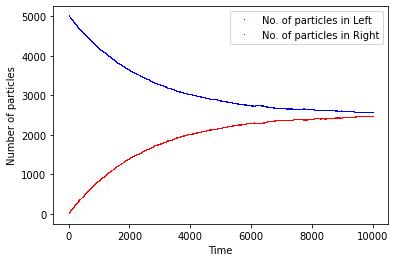

In [3]:
#Q2

nL=5000
nR=0
T=10000
dT=1
            
NL,NR,NT=ar.BoxRL(nL,nR,T,dT)

plt.plot(NT,NL,'b,',label='No. of particles in Left')
plt.plot(NT,NR,'r,',label='No. of particles in Right')
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.legend()
plt.show()

In [4]:
#Q3

def f1(x):
    y = 2.5 - x*math.exp(x)
    return y

def fd1(x):
    y = -1*(math.exp(x) + x*math.exp(x))
    return y

x=1
e=0.01
d=0.000001

root=ar.NewtonRaphson(x,e,d,f1,fd1)

print('\n Thus, the max displacement will be when F(x) = 0 which is at x =',root,'m.')

NEWTON RAPHSON
0 >> start prev root guess: 0 start new root guess: 1
3 >>  new root: 0.9585863567297973
the solution for x is 9.585864E-01 in 3 iterations.

 Thus, the max displacement will be when F(x) = 0 which is at x = 0.9585863567297973 m.


In [5]:
#Q4

def funcq4(phi):
    a = math.sin(math.pi/8)
    y = 1/(math.sqrt(1 - (a**2)*(math.sin(phi)**2)))
    return y

z=ar.SimpsonInt(0,math.pi/2,10,funcq4)
#z=ar.SimpsonInt(x0,xf,N,func)
print('For N =',10,'the simpson integral of func is',z)

ansq4=4*(math.sqrt(1/9.8))*z

print('Thus time period will be', ansq4,'s.')

For N = 10 the simpson integral of func is 1.952893687236705
Thus time period will be 2.495316021423706 s.


Max height is 5.0 m.
Variation of velocity with height with air resistance involved.


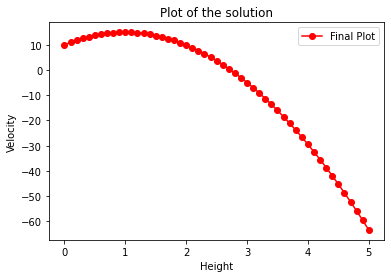

Line here is not a fitting of the polynomial. Has been added to aid the eye to track the points.


In [6]:
#Q5

def d2ydt2(t, y, v):
    return -1*0.02*v - 10

def dydt(t, y, v):
    return v

y0=0
v0=10
a0=10
#FOR MAX HEIGHT REACHED
h_max = (v0**2)/(2*10)

print('Max height is',h_max,'m.')

print('Variation of velocity with height with air resistance involved.')
x0_1, y0_1, z0_1 = ar.RKXY(d2ydt2, dydt, y0, v0, a0, h_max, 0.1, 'yes','Height','Velocity')
#RKXY(d2ydx2, dydx, y0, y'0, y"0, yf, st, yes)

In [7]:
#Q6

#matrix A
A=[[1,-2,0,5],[0,7,1,5],[0,4,4,0],[0,0,0,2]]

#to give a guess vector replace 'random' with a guess vector of form [[1],[1],[1]] or it will take a random guess vector
lambda1,v1=ar.EigenPI(A,20,1e-3,'random')


 Guess vector: [[12345], [32422], [19731], [7040]]

 Matrix A: [[1, -2, 0, 5], [0, 7, 1, 5], [0, 4, 4, 0], [0, 0, 0, 2]] 
 
 Eignvector: [[-0.1980637257569878], [0.6931674364491371], [0.6930293396282025], [5.383501331959961e-07]] 
 
 Eigenvalue: 8.00026640291702 
 
 in 9 iterations.



 The solved matrix form is system of linear equations is: 

[26.0, 1.9984014443252818e-15, 37.440000000000005, -1.7763568394002505e-15, 96.85278719999998] ( A 1 ) [-9.216999999999992]
[1.9984014443252818e-15, 37.440000000000005, -1.7763568394002505e-15, 96.85278719999998, -1.4210854715202004e-14] ( A 2 ) [-122.42503999999998]
[37.440000000000005, -1.7763568394002505e-15, 96.85278719999998, -1.4210854715202004e-14, 297.6805158912] ( A 3 ) [-30.812012800000023]
[-1.7763568394002505e-15, 96.85278719999998, -1.4210854715202004e-14, 297.6805158912, 2.842170943040401e-14] ( A 4 ) [-354.52698675199997]
[96.85278719999998, -1.4210854715202004e-14, 297.6805158912, 2.842170943040401e-14, 994.2958163802193] ( A 5 ) [-98.29054222335999]

 ##### 


 System of linear equations after Gauss Jordan Elimination is: 

[1.0, 0.0, 0.0, 0.0, 0.0] ( X 1 ) [-3.19]
[0.0, 1.0, 0.0, 0.0, 0.0] ( X 2 ) [-1.194]
[0.0, 0.0, 1.0, 0.0, 0.0] ( X 3 ) [2.334]
[0.0, 0.0, 0.0, 1.0, 0.0] ( X 4 ) [-0.803]
[0.0, 0.0, 0.0, 0.

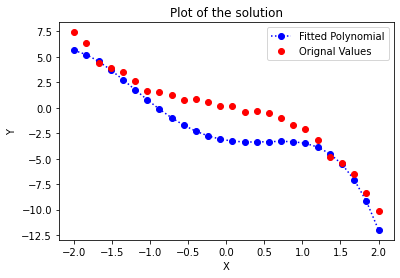

In [8]:
#Q7

with open('esem4fit.txt', 'r') as f1:
    m = [[float(num) for num in line.split(',')] for line in f1 ]

X=[]
Y=[]

for i in range(0,len(m)):
    X.append(m[i][0])
    Y.append(m[i][1])

ar.PolyFitLS(X,Y,5)